# Statistics & Econometrics practical task

#### $by$ $Anastasiia$ $Khaburska$



 ___________________________________________________________________




### Problem 1: Descriptive Statistics and Probability Theory: Real Data on CEO Compensation

In [1]:
library(ggplot2)
library(gridExtra)
library(grid)

In [2]:
df <- read.csv("ceo.csv", header = TRUE)
df<-df[,-ncol(df)]
#"n ceos"  dim(df)[1] "n features" dim(df)[2]
head(df , 4)

salary,totcomp,tenure,age,sales,profits,assets
3030,8138,7,61,161315,2956,257389
6050,14530,0,51,144416,22071,237545
3571,7433,11,63,139208,4430,49271
3300,13464,6,60,100697,6370,92630


Number of CEOs 447

Number of features 7

$salary$ = 1999 salary + bonuses in 1000 US$

$totcomp$ = 1999 CEO total compensation

$tenure$ = # of years as CEO (=0 if less than 6 months)

$age$ = age of CEO

$sales$ = total 1998 sales revenue of firm i

$profits$ = 1998 profits for firm i

$assets$ = total assets of firm i in 1998


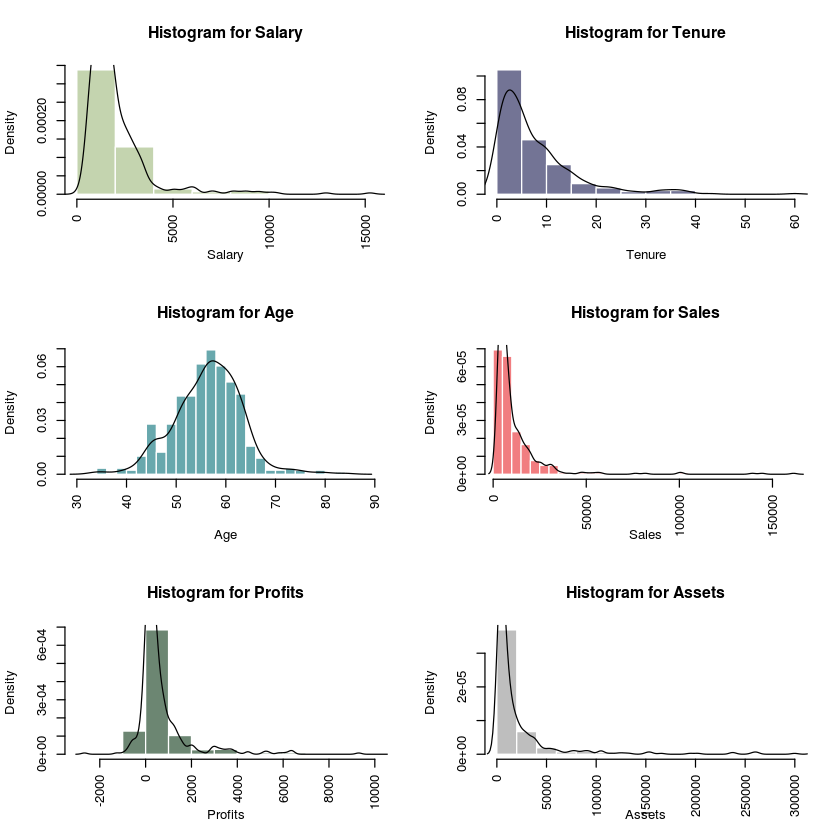

In [3]:
par(mfrow=c(3,2))
hist(df$salary, 
     main="Histogram for Salary", 
     xlab="Salary", 
     border=F, 
     col="#c4d4af", 
     xlim=c(0,15500), 
     las=3, 
     #breaks=32, 
     prob = TRUE)
lines(density(df$salary))

hist(df$tenure, 
     main="Histogram for Tenure", 
     xlab="Tenure", 
     border=F, 
     col="#737495", 
     xlim=c(0,60), 
     las=3, 
     breaks=12, 
     prob = TRUE)
lines(density(df$tenure))

hist(df$age, 
     main="Histogram for Age", 
     xlab="Age", 
     border=F, 
     col="#68a8ad", 
     xlim=c(30,90), 
     las=3, 
     breaks=20, 
     prob = TRUE)
lines(density(df$age))

hist(df$sales, 
     main="Histogram for Sales", 
     xlab="Sales", 
     border=F, 
     col="#f17d80", 
     xlim=c(2000,162000), 
     las=3, 
     breaks=32, 
     prob = TRUE)
lines(density(df$sales))

hist(df$profits, 
     main="Histogram for Profits", 
     xlab="Profits", 
     border=F, 
     col="#6c8672", 
     xlim=c(-3000,10000), 
     las=3, 
     breaks=26, 
     prob = TRUE)
lines(density(df$profits))

hist(df$assets, 
     main="Histogram for Assets", 
     xlab="Assets", 
     border=F, 
     col="gray", 
     xlim=c(0,300000), 
     las=3, 
     breaks=30, 
     prob = TRUE)

lines(density(df$assets))

________________________________________________________________________________________________________________________



#### a) For the variable salary compute the common location measures: mean, 10%- trimmed mean, median, upper and lower quartiles, the upper and lower 10%- quantiles. Give an economic interpretation for every location measure.



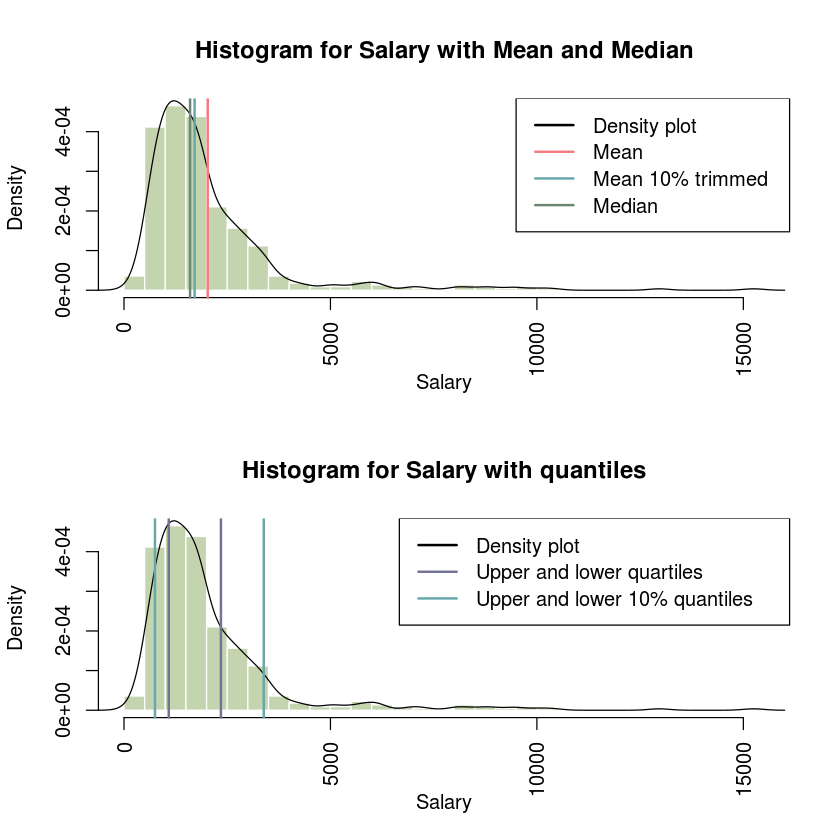

In [4]:
par(mfrow=c(2,1))

hist(df$salary, 
     main="Histogram for Salary with Mean and Median", 
     xlab="Salary", 
     border=F, 
     col="#c4d4af", 
     xlim=c(0,15500), 
     las=3, 
     breaks=32, 
     prob = TRUE)
lines(density(df$salary))

abline(v = mean(df$salary),
 col = "#f17d80",
 lwd = 2)

abline(v = mean(df$salary, trim = 0.1),
 col = "#68a8ad",
 lwd = 2)

abline(v = median(df$salary),
 col = "#6c8672",
 lwd = 2)     

legend(x = "topright", 
 c("Density plot", "Mean","Mean 10% trimmed", "Median"),
 col = c("black", "#f17d80", "#68a8ad", "#6c8672"),
 lwd = c(2, 2, 2))


hist(df$salary, 
     main="Histogram for Salary with quantiles", 
     xlab="Salary", 
     border=F, 
     col="#c4d4af", 
     xlim=c(0,15500), 
     las=3, 
     breaks=32, 
     prob = TRUE)
lines(density(df$salary))

abline(v = quantile(df$salary,0.25),
 col = "#737495",
 lwd = 2)

abline(v = quantile(df$salary,0.75),
 col = "#737495",
 lwd = 2)

abline(v = quantile(df$salary,0.1),
 col = "#68a8ad",
 lwd = 2)

abline(v = quantile(df$salary,0.9),
 col = "#68a8ad",
 lwd = 2)     

legend(x = "topright", 
 c("Density plot", "Upper and lower quartiles", "Upper and lower 10% quantiles"),
 col = c("black", "#737495", "#68a8ad"),
 lwd = c(2, 2, 2))


In [5]:
statistics_names<-c("mean","10% trimmed mean","median","upper quartile","lower quartile","upper 10% quantile","lower 10% quartile")
statistics<-c(mean(df$salary), mean(df$salary, trim = 0.1),median(df$salary), quantile(df$salary,0.75),quantile(df$salary,0.25),quantile(df$salary,0.9),quantile(df$salary,0.1))
task_a<-data.frame(statistics_names,statistics)
task_a


statistics_names,statistics
mean,2027.517
10% trimmed mean,1710.092
median,1600.000
upper quartile,2347.500
lower quartile,1084.000
upper 10% quantile,3384.400
lower 10% quartile,750.000


This all are location measures, so the salary observation values are between $100$ and $15250$, its average location is $2027.5$, but, because the sample is asymmetric and has outliers, its mean is comparatively far from its median.

To characterise location of the sample more presize we can also compute quantiles and quartiles. As observable on the histogram $80$% of the sample lies between $1084$ and $3384$, and $50$% of the sample lies betwee $1084$ and $2347.5$. So only $10$%-trimmed mean is much more closer to the median of the sample. This is a vivid example to understand that the mean is very sensitive to outliers, those conclusions and predictions based on the $10$% trimmed sample will be much more revealing.

________________________________________________________________________________________________________________________

#### b) Plot the empirical cumulative distribution function. Compute and explain in economic terms the following quantities
#####     i. F̂ −1 (0.2) and F̂ −1 (0.8)
#####    ii. F̂ (1000) and 1 − F̂ (5000)


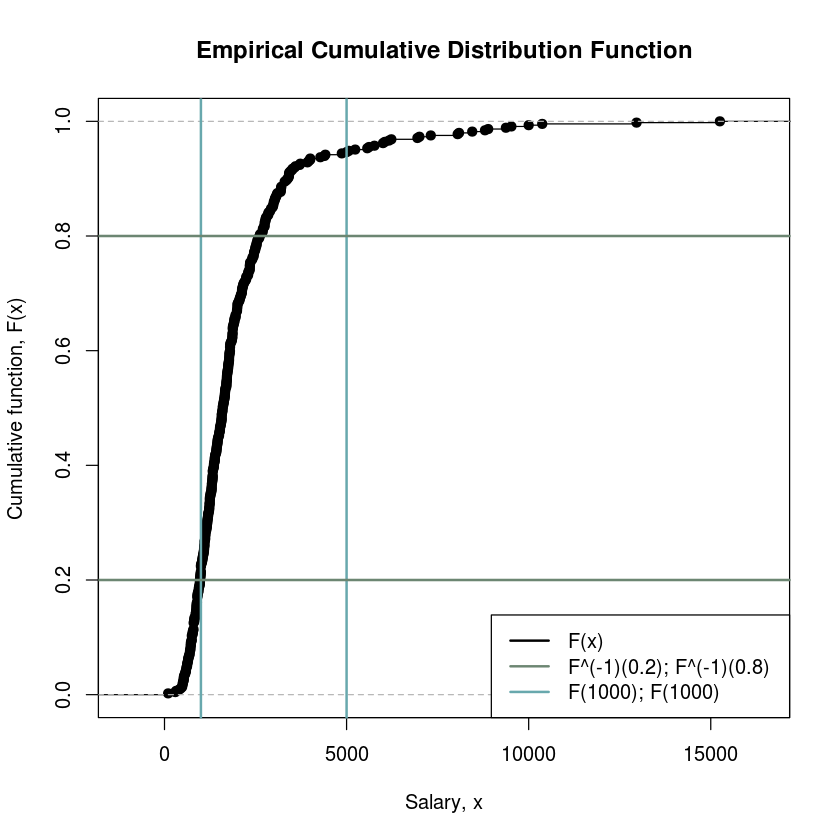

In [6]:
Fn = ecdf(df$salary) 
plot(Fn, main="Empirical Cumulative Distribution Function", xlab="Salary, x", ylab="Cumulative function, F(x)")

abline(v = 1000,
 col = "#68a8ad",
 lwd = 2)

abline(v = 5000,
 col = "#68a8ad",
 lwd = 2)

abline(h = 0.2,
 col = "#6c8672",
 lwd = 2)

abline(h = 0.8,
 col = "#6c8672",
 lwd = 2)

legend(x = "bottomright", 
 c("F(x)", "F^(-1)(0.2); F^(-1)(0.8)", "F(1000); F(1000)"),
 col = c("black", "#6c8672", "#68a8ad"),
 lwd = c(2, 2, 2))

In [7]:
cat(paste("\n\n\nF^(-1)(0.2) = ", quantile(df$salary,0.2), "this number is higher than 20% of observed salaries", 
          "\nF^(-1)(0.8) = ", quantile(df$salary,0.8), "this number is higher than 80% of observed salaries",
          "\n60% CEO have salary between 976.2 and 2613\n",  
          "\nF(1000)     = ", Fn(1000), "   relative number of salaries equal to or less than 1000",
          "\nF(5000)     = ", Fn(5000), "   relative number of salaries equal to or less than 5000",
          "\n1 - F(5000) = ", 1 - Fn(5000), "  relative number of observations higher than 5000"))




F^(-1)(0.2) =  976.2 this number is higher than 20% of observed salaries 
F^(-1)(0.8) =  2613 this number is higher than 80% of observed salaries 
60% CEO have salary between 976.2 and 2613
 
F(1000)     =  0.223713646532438    relative number of salaries equal to or less than 1000 
F(5000)     =  0.946308724832215    relative number of salaries equal to or less than 5000 
1 - F(5000) =  0.0536912751677853   relative number of observations higher than 5000

Empirical cumulative distributuve function has risen sharply on the left 
and relative number of observations equal to or less than 5000 = 0.946, 
which also indicates that there are several outliers in those remaining 5.37%

The CDF takes as input x and returns values from the [0,1] interval - probabilities of X being smaller than or equal to  x: 

p = Pr(X≤x)=F(x)

The inverse of the CDF tells what x would make F(x) return some value p. It is obvious that to find out inverse of CDF we can simply compute p-percent quantile. 

________________________________________________________________________________________________________________________

#### c) Plot the histogram of salary and the Box-plot (or violin-plot). What can be concluded about the distribution of the data? Are the location measures computed above still appropriate? Compute and discuss an appropriate measure of symmetry.

Loading required package: sm
Package 'sm', version 2.2-5.5: type help(sm) for summary information


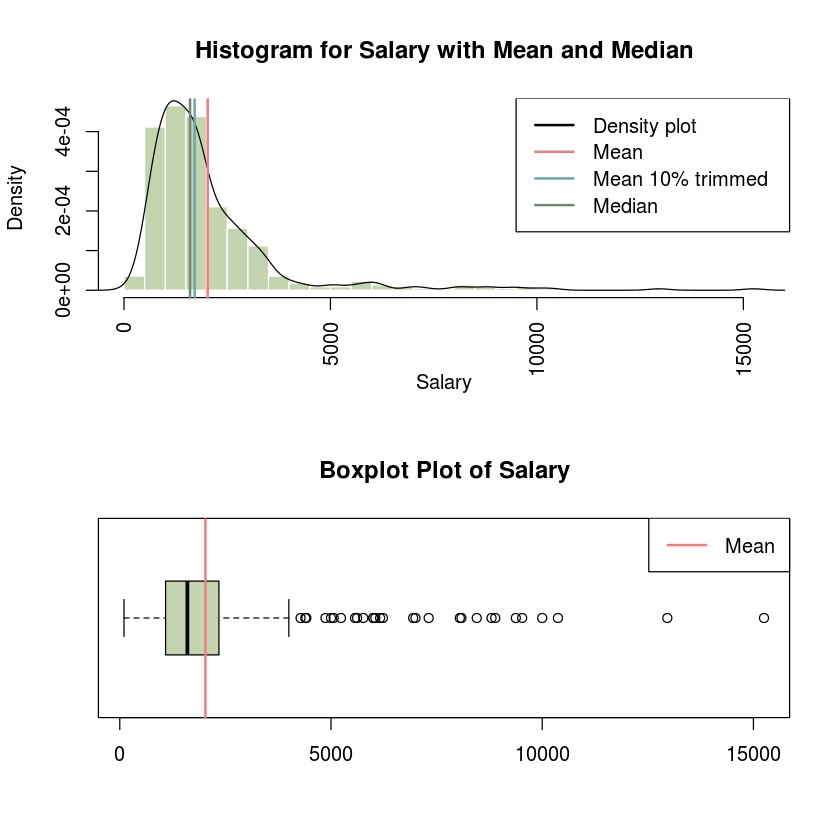

In [8]:
par(mfrow=c(2,1))

hist(df$salary, 
     main="Histogram for Salary with Mean and Median", 
     xlab="Salary", 
     border=F, 
     col="#c4d4af", 
     xlim=c(0,15500), 
     las=3, 
     breaks=32, 
     prob = TRUE)
lines(density(df$salary))

abline(v = mean(df$salary),
 col = "#f17d80",
 lwd = 2)

abline(v = mean(df$salary, trim = 0.1),
 col = "#68a8ad",
 lwd = 2)

abline(v = median(df$salary),
 col = "#6c8672",
 lwd = 2)     

legend(x = "topright", 
 c("Density plot", "Mean","Mean 10% trimmed", "Median"),
 col = c("black", "#f17d80", "#68a8ad", "#6c8672"),
 lwd = c(2, 2, 2))

library(vioplot)
boxplot(df$salary, col="#c4d4af", horizontal=TRUE)
title("Boxplot Plot of Salary")

abline(v = mean(df$salary),
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))


Out of this box-plot and histogram it can be concluded that our sample is right skewed.
ALso it can be proved by calculating a measure of sample skewness (empirical skewness):
$$\frac{1}{n}\sum_{i=1}^n{\left(\frac{x_i - \overline{x}}{\tilde{s}}\right)^3}$$

In [9]:
X<-0
for (i in 1:length(df$salary))
{
    X<-X+((df$salary[i]-mean(df$salary))/sqrt(var(df$salary)))^3
}
X/length(df$salary)

[1] 3.379632

skewness > 0, so sample is really right-skewed

Also median can be used to characterize asymmetric data, as median minimizes the mean absolute deviation to all data points.

#### d) Check which method is used in your software to compute the optimal bandwidth (or the number of bars) in the histogram. Describe it shortly here. Make plots of too detailed and too rough histograms. What can we learn from these figures?


By default, inside of hist a two-stage process will decide the break points used to calculate a histogram:

 1. The function nclass.Sturges receives the data and returns a recommended number of bars for the histogram. It's  based on the number of values, as $ceiling(log2(length(x)) + 1)$.
 2. Then the data and the recommended number of bars gets passed to pretty.default, which tries to "Compute a sequence of about n+1 equally spaced ‘round’ values which cover the range of the values in x. The values are chosen so that they are 1, 2 or 5 times a power of 10." 


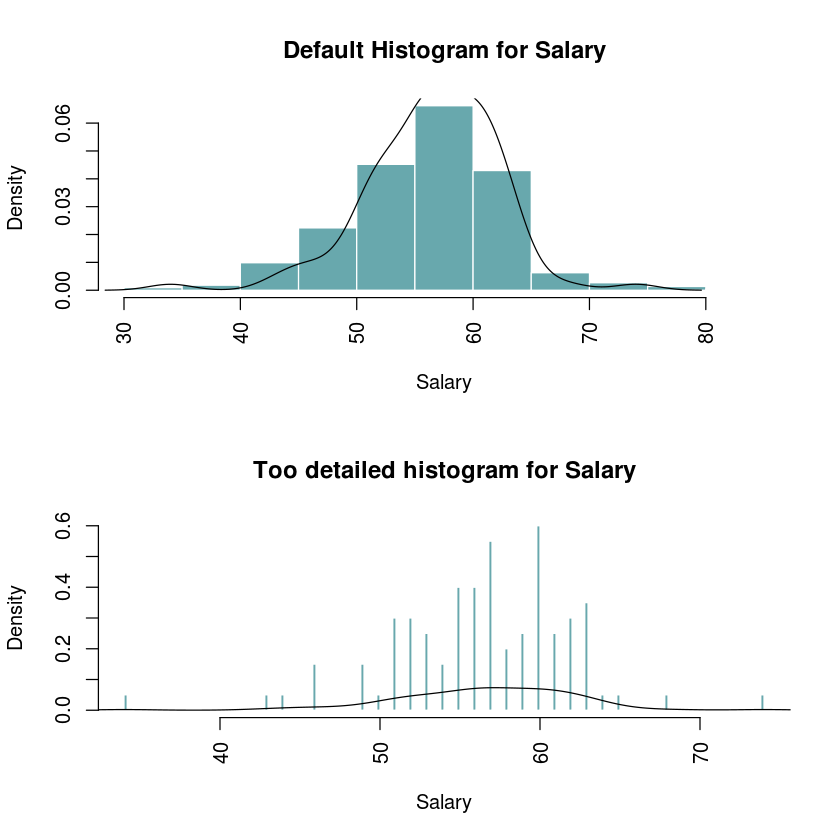

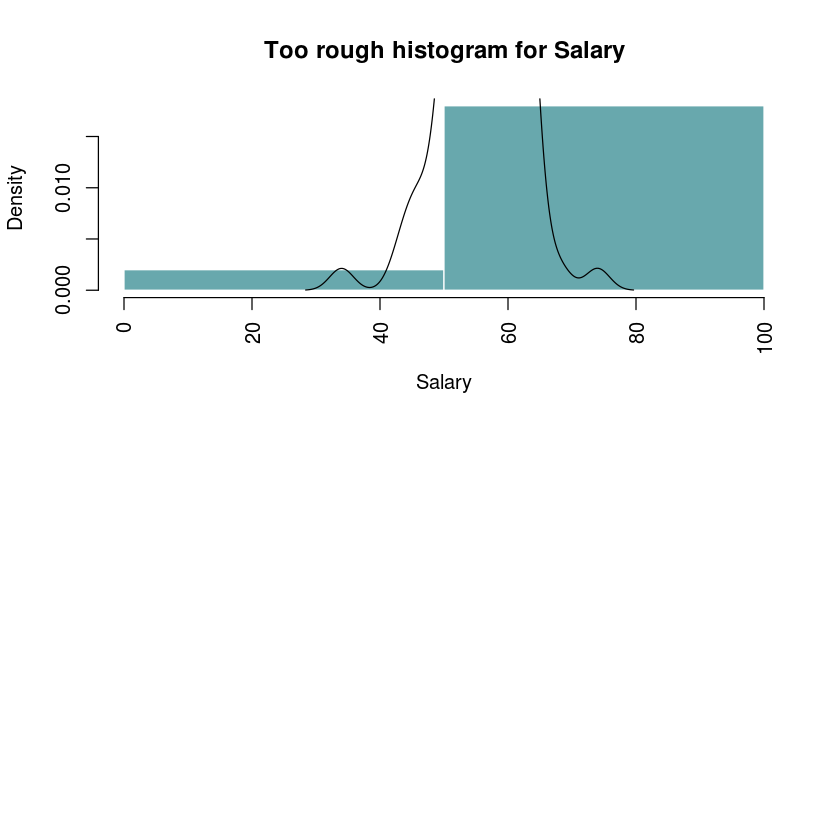

In [10]:
par(mfrow=c(2,1))
hist(head(df$age,1000), 
     main="Default Histogram for Salary", 
     xlab="Salary", 
     border=F, 
     col="#68a8ad", 
     las=3, 
     prob = TRUE)
lines(density(head(df$age,100)))

hist(head(df$age,100), 
     main="Too detailed histogram for Salary", 
     xlab="Salary", 
     border=F, 
     col="#68a8ad",
     las=3, 
     breaks=150, 
     prob = TRUE)
lines(density(head(df$age,100)))

hist(head(df$age,100), 
     main="Too rough histogram for Salary", 
     xlab="Salary", 
     border=F, 
     col="#68a8ad", 
     las=3, 
     breaks=1, 
     prob = TRUE)
lines(density(head(df$age,100)))

It can be concluded that if you use too few bins, the histogram doesn't really portray the data very well. If you have too many bins, you get a broken comb look, which also doesn't give a sense of the distribution.

One solution is to create a graph that shows every value. Either a dot plot, or a cumulative frequency distribution, which doesn't require any bins.

Another solution is to create a frequency distribution with equally spaced bins, (as in R). Bandwidth should clearly depend on the number of values. Tere are several methods to determine the “best” bandwidth and Sturges method is one of them. It's only optimal for gaussian data and underestimates number of bins for large non-gaussian datasets.

________________________________________________________________________________________________________________________

#### e) There are methods which help us make the distribution of the sample more symmetric. Consider the natural logarithm of the salatry: ln(salary). Plot the histogram (and Box-plot) and compare it with the figures for original data. Compute the mean and the median. What can be concluded from the new values. Provide economic interpretation.

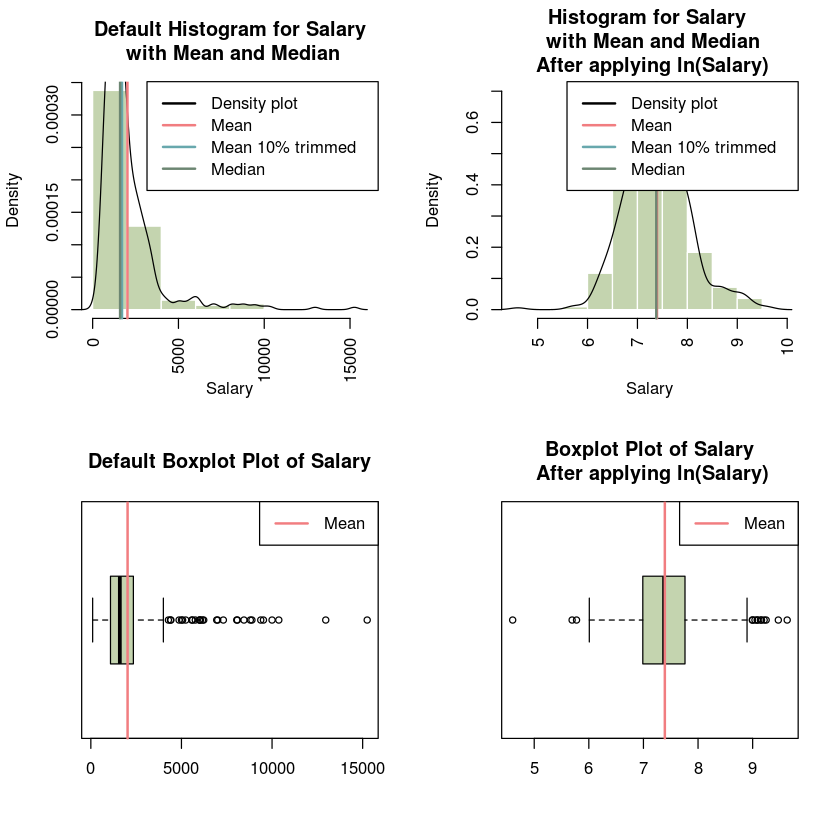

In [11]:
par(mfrow=c(2,2))

hist (df$salary,
     main="Default Histogram for Salary\n with Mean and Median", 
     xlab="Salary", 
     border=F, 
     col="#c4d4af", 
     #xlim=c(0,15500), 
     las=3, 
     prob = TRUE)
lines(density(df$salary))

abline(v = mean(df$salary),
 col = "#f17d80",
 lwd = 2)

abline(v = mean(df$salary, trim = 0.1),
 col = "#68a8ad",
 lwd = 2)

abline(v = median(df$salary),
 col = "#6c8672",
 lwd = 2)     

legend(x = "topright", 
 c("Density plot", "Mean","Mean 10% trimmed", "Median"),
 col = c("black", "#f17d80", "#68a8ad", "#6c8672"),
 lwd = c(2, 2, 2))

hist(log(df$salary), 
     main="Histogram for Salary \n with Mean and Median\n After applying ln(Salary)", 
     xlab="Salary", 
     border=F, 
     col="#c4d4af", 
     #xlim=c(0,15500), 
     las=3, 
     #breaks=32, 
     prob = TRUE)
lines(density(log(df$salary)))

abline(v = mean(log(df$salary)),
 col = "#f17d80",
 lwd = 2)

abline(v = median(log(df$salary)),
 col = "#6c8672",
 lwd = 2)     

legend(x = "topright", 
 c("Density plot", "Mean","Mean 10% trimmed", "Median"),
 col = c("black", "#f17d80", "#68a8ad", "#6c8672"),
 lwd = c(2, 2, 2))

boxplot(df$salary, col="#c4d4af", horizontal=TRUE)
title("Default Boxplot Plot of Salary")

abline(v = mean(df$salary),
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))

boxplot(log(df$salary), col="#c4d4af", horizontal=TRUE)
title("Boxplot Plot of Salary\n After applying ln(Salary)")

abline(v = mean(log(df$salary)),
 col = "#f17d80",
 lwd = 2)

legend(x = "topright", 
 "Mean",
 col =  "#f17d80",
 lwd = c(2, 2, 2))

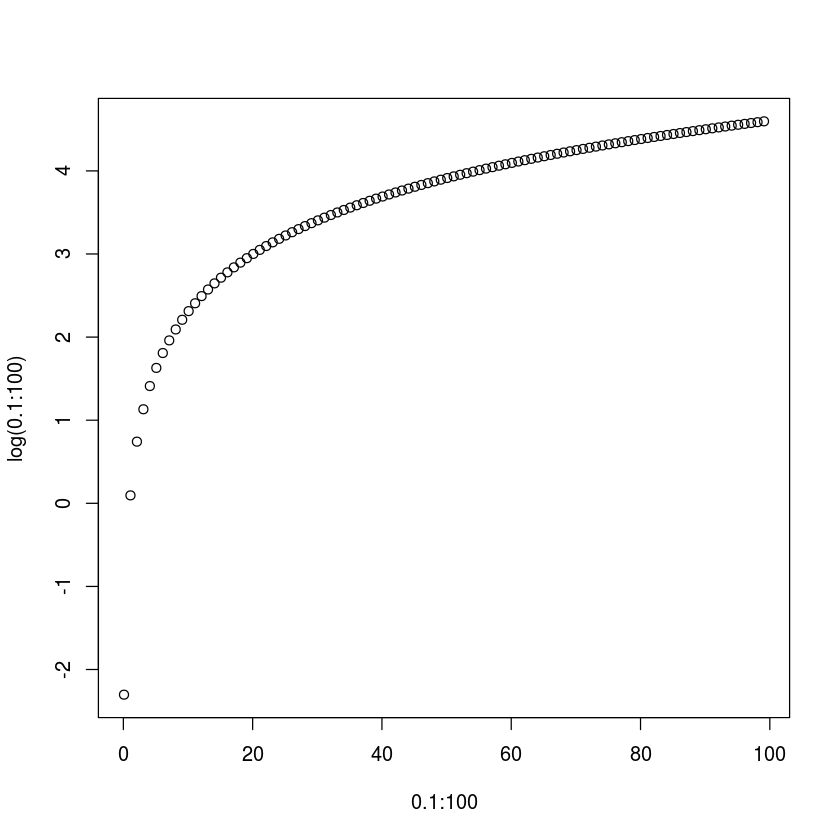

In [12]:
plot(x=0.1:100, y = log(0.1:100))

A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. 
More specifically, a normal or Gaussian distribution is often regarded as ideal as it is assumed by many statistical methods.

To reduce right skewness, taking roots or logarithms may be used. To reduce left skewness, taking square or cube or higher powers may be helpful.

Log function essentially deemphasizes very large values. As can be observed from the above plot, large values on the x-axis are relatively smaller on the y-axis.

In our sample there are few very large values. The log transformation essentially reels these values into the center of the distribution making it look more like a Normal distribution.

Also, after such transformation, mean and median metrics become almost the same, that also indicates that our sample becomes more centrilized.

________________________________________________________________________________________________________________________

#### 2. Next we try to make a more detailed analysis of the data (without logarithm).
________________________________________________________________________________________________________________________


#### a) We suspect that the salary of the CEO and other variables are related. Compute the correlation coefficients of Pearson and plot them as a heatmap (correlation map). Discuss the strength of the correlations.

In [13]:
library(ggplot2)
library(reshape2)
library(wesanderson)
library(ggcorrplot)

[1] "Correlation between salary of the CEO and other variables "

totcomp   0.322023306104773 
tenure    0.172448580689028 
age       0.119465568250892 
sales     0.371255615986629 
profits   0.370315209793116 
assets    0.431035993464785

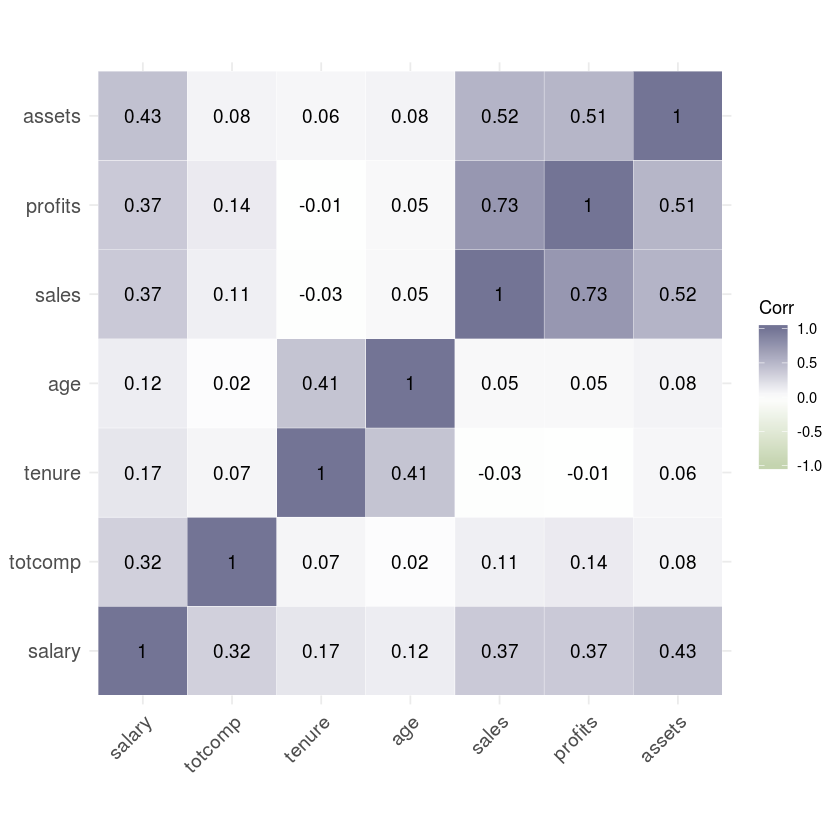

In [14]:
corr <- round(cor(df, method = c("pearson")), 2)

ggcorrplot(corr, lab = TRUE,
   outline.col = "white",
   colors = c("#c4d4af", "white", "#737495"))

"Correlation between salary of the CEO and other variables "

cat(paste("totcomp  ", cor(df$salary, df$totcomp, method = c("pearson")),
          "\ntenure   ", cor(df$salary, df$tenure, method = c("pearson")),
          "\nage      ", cor(df$salary, df$age, method = c("pearson")),
          "\nsales    ", cor(df$salary, df$sales, method = c("pearson")),
          "\nprofits  ", cor(df$salary, df$profits, method = c("pearson")),
          "\nassets   ", cor(df$salary, df$assets, method = c("pearson"))))

The correlation between salary and other variables is comparatively small. Maybe only correlation between salary and assets can be considered as essential.

Also, as can be seen out of heat map, there is a strong correlation between total 1998 sales revenue , profits and assets of firms, which makes sense.

________________________________________________________________________________________________________________________

#### b) Plot the scatter plots (pairs in R). Conclude if the linear correlation coefficients are appropriate here. Compute now the Spearman’s correlations and make a heatmap. Compare the results with Pearson. What is the rank of the observation salary= 6000?


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



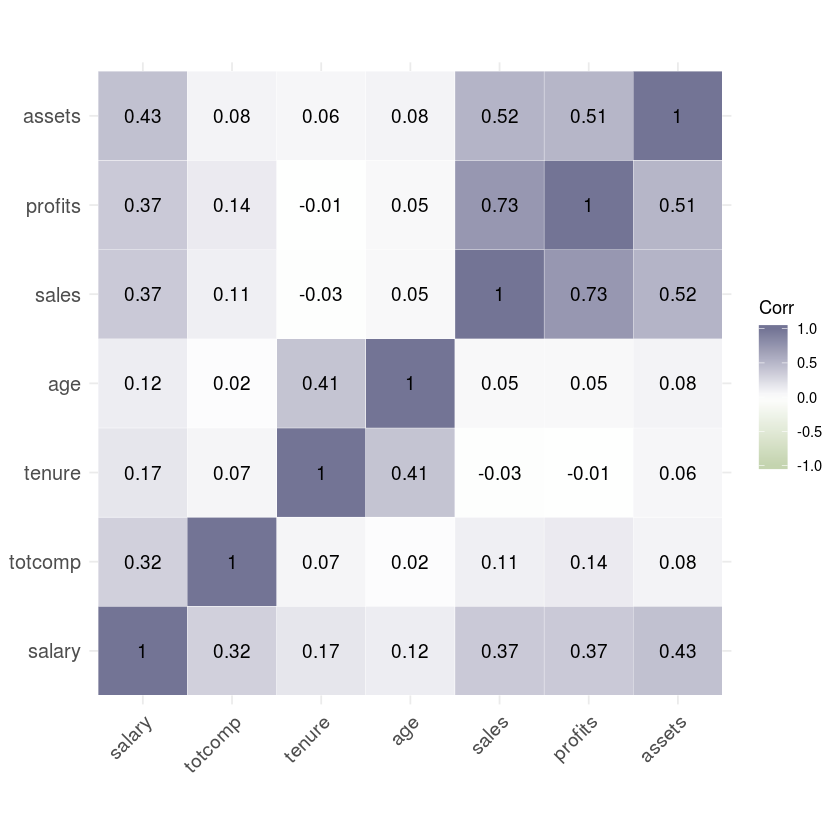

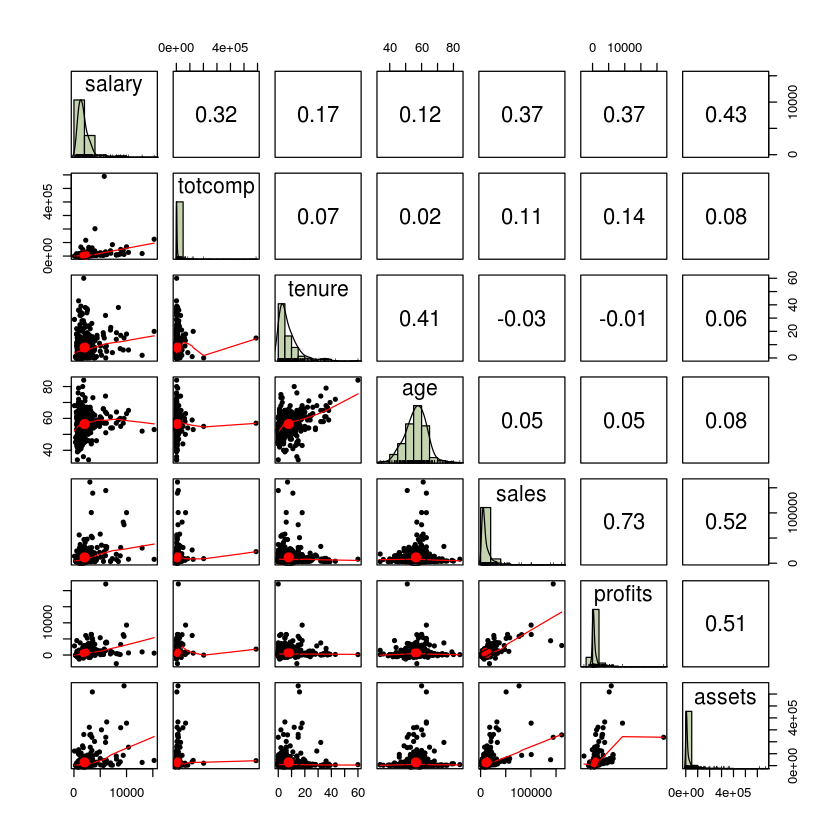

In [15]:
library(psych)
par(mfrow=c(1,2))
#my_cols <- c("#00AFBB", "#E7B800", "#FC4E07")  
#pairs(df, pch = 19,  cex = 0.5)

corr <- round(cor(df, method = c("pearson")), 2)
ggcorrplot(corr, lab = TRUE,
   outline.col = "white",
   colors = c("#c4d4af", "white", "#737495"))

pairs.panels(df, 
             method = "pearson", # correlation method
             hist.col = "#c4d4af",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

Looking on those scatter plots and having values of the correlation coefficients, I can make a conclusion that linear correlation between salarry and all the others values is not appropriate.

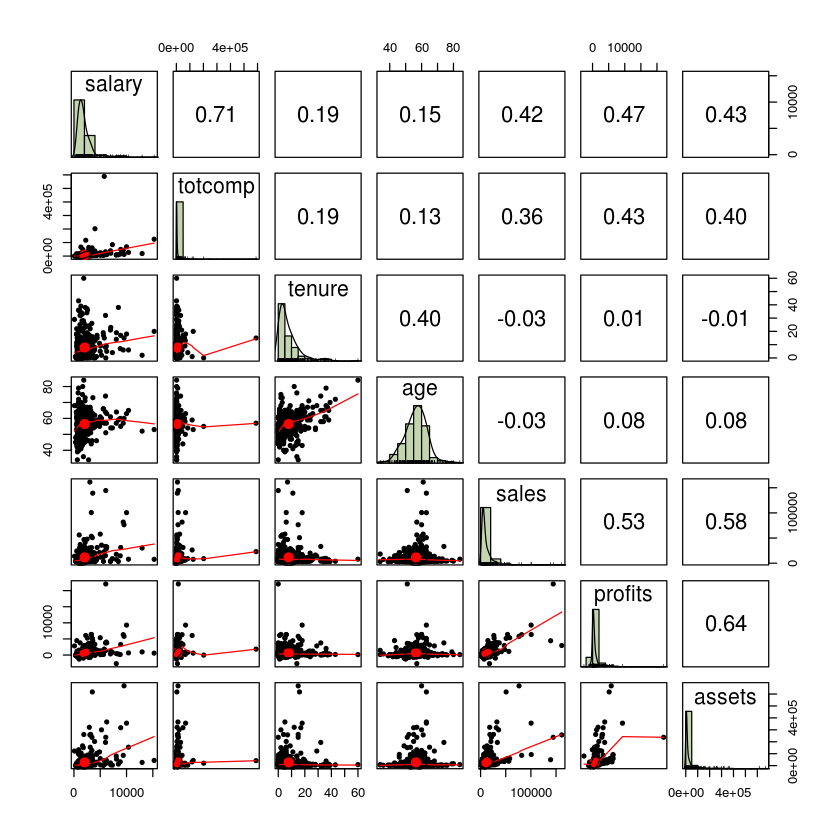

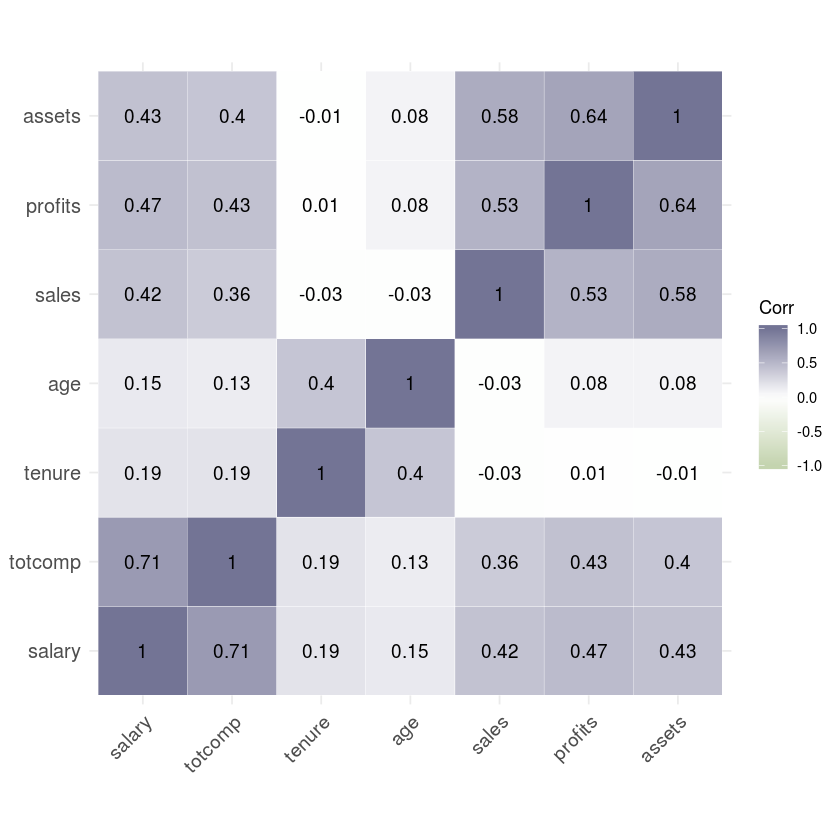

In [16]:
pairs.panels(df, 
             method = "spearman", # correlation method
             hist.col = "#c4d4af",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

par(mfrow=c(1,2))
corr <- round(cor(df, method = c), 2)
ggcorrplot(corr, lab = TRUE,
   outline.col = "white",
   colors = c("#c4d4af", "white", "#737495"))

Spearman's correlation is much more appropriate for observing relations between salary and all the other values. Which means that there are some monotonic relationships between salary and totcomp ( and sales, profits, assets ~45%). This means that the salary and totcomp variables tend to change together, but not necessarily at a constant rate. 

rank (6000) = 429.5 because there are to observations of salary equal 6000$ (429 and 430)


________________________________________________________________________________________________________________________


#### c) Consider the two subsamples: CEOs younger than 50 and older than 50. Plot for both subsamples overlapping histograms/ecdf’s and discuss the results. What can we learn from the corresponding location and dispersion (!) measures?

In [17]:
ceos_younger_50 <- df[ which(df$age < 50),]
ceos_older_50 <- df[ which(df$age > 50),]

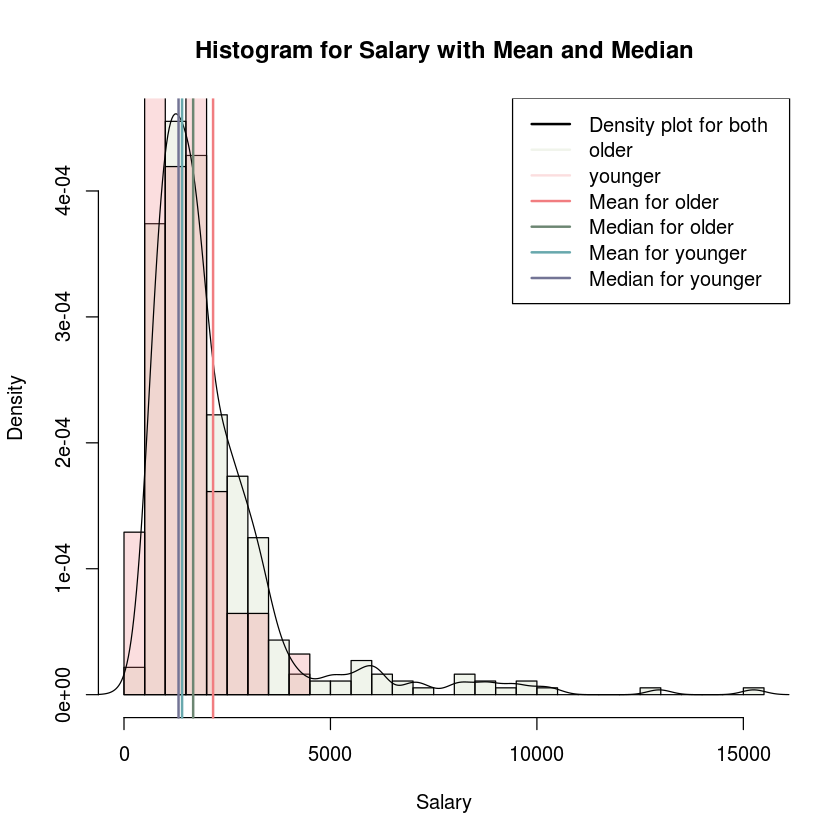

In [18]:
set.seed(42)

hist(ceos_older_50$salary, 
     main="Histogram for Salary with Mean and Median", 
     xlab="Salary", 
     border=T,
     col=rgb(0.769,0.831,0.686,1/4),
     breaks=32,
     xlim=c(0,15500), 
     prob = TRUE)                    # centered at 4 
hist(ceos_younger_50$salary, 
     border=T, 
     col=rgb(0.945,0.49,0.502,1/4), 
     xlim=c(0,15500), 
     prob = TRUE,
    add=T)  


lines(density(ceos_older_50$salary))

abline(v = mean(ceos_older_50$salary),
 col = "#f17d80",
 lwd = 2)

abline(v = median(ceos_older_50$salary),
 col = "#6c8672",
 lwd = 2)     

abline(v = mean(ceos_younger_50$salary),
 col = "#68a8ad",
 lwd = 2)

abline(v = median(ceos_younger_50$salary),
 col = "#737495",
 lwd = 2) 

legend(x = "topright", 
 c("Density plot for both", "older",  "younger", "Mean for older", "Median for older","Mean for younger","Median for younger"),
 col = c("black", rgb(0.769,0.831,0.686,1/4), rgb(0.945,0.49,0.502,1/4), "#f17d80", "#6c8672","#68a8ad","#737495"),
 lwd = c(2, 2, 2))


All younger CEOs have salary less then 5000, so sample with younger CEOs is less right-skewed.Also it can be seen because difference between average and median is not significant.

Sample with older CEOs has many outliers with high salary, so sample is right-skewed. Also difference the mean and the median is really large.

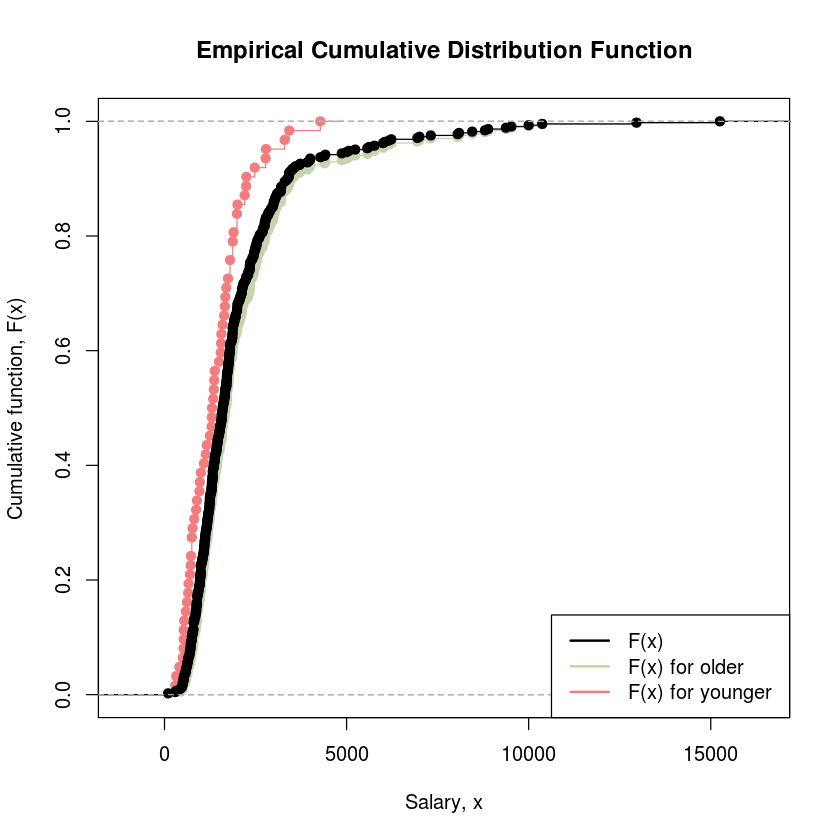

In [19]:
Fn = ecdf(df$salary)
Fn1 = ecdf(ceos_younger_50$salary) 
Fn2 = ecdf(ceos_older_50$salary) 

#par(mfrow=c(2,2))

plot(Fn2, verticals=TRUE,col="#c4d4af", main="Empirical Cumulative Distribution Function", xlab="Salary, x", ylab="Cumulative function, F(x)", )
plot(Fn1, verticals=TRUE,col="#f17d80", add=T)
plot(Fn, verticals=TRUE, col="black",add=T)


legend(x = "bottomright", 
 c("F(x)","F(x) for older", "F(x) for younger"),
 col = c("black", "#c4d4af", "#f17d80"),
 lwd = c(2, 2, 2))

locations<-c("Mean", "Mean 10% trimmed", "Median","Variance","")


In [20]:
library(e1071) 
measures <- matrix(round(c(
    mean(df$salary),median(df$salary),min(df$salary),max(df$salary),IQR(df$salary),var(df$salary),skewness(df$salary),
    mean(ceos_younger_50$salary),median(ceos_younger_50$salary),min(ceos_younger_50$salary),max(ceos_younger_50$salary),IQR(ceos_younger_50$salary),var(ceos_younger_50$salary),skewness(ceos_younger_50$salary),
    mean(ceos_older_50$salary),median(ceos_older_50$salary),min(ceos_older_50$salary),max(ceos_older_50$salary),IQR(ceos_older_50$salary),var(ceos_older_50$salary),skewness(ceos_older_50$salary)), digits=3), ncol=7,byrow=TRUE)
colnames(measures) <- c("Mean","Median","Min","Max"," Interquartile ran.", "Sample Variance" , " Sample Skewness")
rownames(measures) <- c("All","< 50","> 50")
measures <- as.table(measures)
measures

            Mean      Median         Min         Max  Interquartile ran.
All     2027.517    1600.000     100.000   15250.000            1263.500
< 50    1406.548    1321.000     297.000    4280.000            1050.000
> 50    2157.339    1675.000     100.000   15250.000            1379.000
     Sample Variance  Sample Skewness
All      2967234.963            3.380
< 50      648907.858            1.126
> 50     3380499.708            3.182

The empirical/sample variance is very sensitive to outliers .
The empirical/sample variance is only reasonable for symmetric data.

It can be concluded, that data about older CEOs is much more disperse than conserning younger CEOs. So there are older CEOs who have small salary, but there are a lot of them who earn really much. The differences between salaries of younger CEOs are not so significant.

________________________________________________________________________________________________________________________

#### 3. Consider another grouping of the data. Define the groups:
$$
\left\{
    \begin{array}{ll}
        S_1 \qquad if \quad salary \lt 2000 \\
        S_2 \qquad if \quad salary \ge 2000 \quad but \lt 4000\\
        S_3 \qquad if \quad salary \ge 4000
    \end{array}
\right.
\left\{
    \begin{array}{ll}
        A_1 \qquad if \quad age \lt 50 \\
        A_2 \qquad if \quad age \ge 50
    \end{array}
\right.
$$

________________________________________________________________________________________________________________________

#### a) Aggregate the data to a 2 × 3 contigency table with absolute and with relative frequencies.


In [21]:
absolute_frequencies <- matrix(c(
    length(df[ which(df$salary < 2000 & df$age < 50),]$salary),length(df[which(df$salary >= 2000 & df$salary < 4000  & df$age < 50),]$salary),length(df[which(df$salary >= 4000  & df$age < 50),]$salary),length(ceos_younger_50$salary),
    length(df[ which(df$salary < 2000 & df$age >= 50),]$salary),length(df[which(df$salary >= 2000 & df$salary < 4000  & df$age >= 50),]$salary),length(df[which(df$salary >= 4000  & df$age >= 50),]$salary), length(df[which(df$age >= 50),]$salary),
    length(df[ which(df$salary < 2000),]$salary),length(df[which(df$salary >= 2000 & df$salary < 4000),]$salary),length(df[which(df$salary >= 4000),]$salary), length(df$salary)
), ncol=4,byrow=TRUE)
colnames(absolute_frequencies) <- c(" With salary<2000", " With 2000<=salary<4000" ,"  With 4000<=salary", "        Sum" )
rownames(absolute_frequencies) <- c("<  50",">= 50", "Sum")

cat(paste("\n\n\n ________________________absolute frequencies_____________________\n"))
#absolute frequencies
n <- as.table(absolute_frequencies)
n

cat(paste("\n\n\n ________________________relative frequencies_____________________\n"))
#relative frequencies
h<-round(n/n[3,4], digits=3)
h






 ________________________absolute frequencies_____________________


       With salary<2000  With 2000<=salary<4000   With 4000<=salary         Sum
<  50                52                       9                   1          62
>= 50               248                     107                  30         385
Sum                 300                     116                  31         447




 ________________________relative frequencies_____________________


       With salary<2000  With 2000<=salary<4000   With 4000<=salary         Sum
<  50             0.116                   0.020               0.002       0.139
>= 50             0.555                   0.239               0.067       0.861
Sum               0.671                   0.260               0.069       1.000

________________________________________________________________________________________________________________________

#### b) Give interpretation for the values of n 12 , h 12 , n 1· and h 1· .


In [22]:
cat(paste("\nn12 = " , n[1,1]), '     the number of CEOs younger than 50 years, that have salary smaler then 2000$')
cat(paste("\nh12 = " , h[1,1]), '  relative number of CEOs (in relation to all observed) who are younger than 50 years and have salary smaller than 2000$')
cat(paste("\nn1* = " , n[1,4]), '     total number of CEOs younger than 50 years')
cat(paste("\nh1* = " , h[1,4]), '  relative number of CEOs (in relation to all observed) who are younger than 50 years')


n12 =  52      the number of CEOs younger than 50 years, that have salary smaler then 2000$
h12 =  0.116   relative number of CEOs (in relation to all observed) who are younger than 50 years and have salary smaller than 2000$
n1* =  62      total number of CEOs younger than 50 years
h1* =  0.139   relative number of CEOs (in relation to all observed) who are younger than 50 years

________________________________________________________________________________________________________________________

#### c) Compute an appropriate dependence measure for S i and A j . What can be concluded from its value?

In [23]:
X2<-0
for (i in 1:2)
{
for (j in 1:3)
{
X2<-X2+(((n[i,j]-(n[i,4]*n[3,j]/n[3,4]))^2)/(n[i,4]*n[3,j]/n[3,4]))
}
}
X2

[1] 9.578734

In [24]:
C<-sqrt(X2/(X2+447))/sqrt(1/2)
C

[1] 0.2048383

degrees of freedom  = 2

$χ^2$ is comparatively large, but corrected contingency coefficient of Pearson is comparatively small, 

so there is no very strong dependence between X and Y